In [5]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'exp10'
with open(exp + '_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']

measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0         4       50      0.224472  0.080894      0.395897  0.232274
1         8       50      0.215773  0.087731      0.277726  0.177337
2        16       50      0.193514  0.051478      0.193514  0.051763
3        32       50      0.172029  0.048837      0.167706  0.024066
4        50        4      0.269664  0.149828      0.152190  0.023863
5        50        8      0.200428  0.109157      0.156422  0.021589
6        50       16      0.182164  0.096148      0.153530  0.021288
7        50       32      0.156082  0.036921      0.152944  0.021344
8        50       64      0.157374  0.024122      0.157348  0.024056
9        50      128      0.157108  0.019480      0.156973  0.019511
10       50      256      0.155904  0.022789      0.155849  0.022742
11       50      512      0.155068  0.020952      0.154911  0.020887
12       64       50      0.145546  0.021662      0.145546  0.021785
13      128       50      0.120700  0.016770      0.120623  0.016830
14      150       50      0.119176  0.019330      0.118974  0.019332
15      256       50      0.097446  0.016423      0.097318  0.016375
16      350       50      0.084386  0.014225      0.084204  0.014360
17      512       50      0.073007  0.014471      0.072680  0.014521
18     1024       50      0.056529  0.013831      0.056401  0.014191
19     2048       50      0.040166  0.012554      0.040013  0.012637

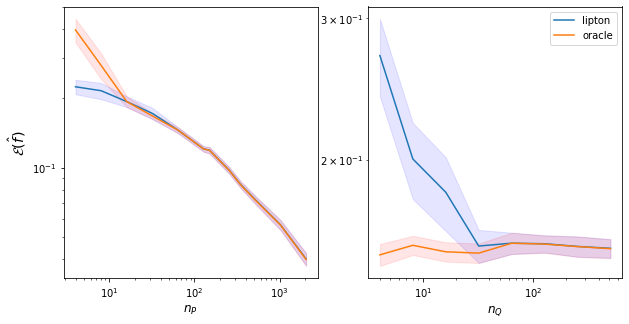

In [7]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [8]:
with open(exp + '_labeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        50      150         0.159704  0.021745       0.134304  0.018824
1        50      350         0.128200  0.018793       0.115571  0.017408
2        50      750         0.096849  0.015248       0.091186  0.014729
3        50     1550         0.074746  0.013731       0.072578  0.013552
4        50     3150         0.053650  0.013774       0.052900  0.013494
5        50     6350         0.040404  0.012663       0.039904  0.012586
6        50    12750         0.030011  0.012830       0.029885  0.012815
7       750       50         0.184241  0.022494       0.062691  0.014309
8      1550       50         0.183850  0.023617       0.044947  0.012989
9      3150       50         0.183927  0.022829       0.034028  0.011262
10     6350       50         0.189547  0.024517       0.026476  0.010321
11    12750       50         0.192403  0.022501       0.019378  0.011274

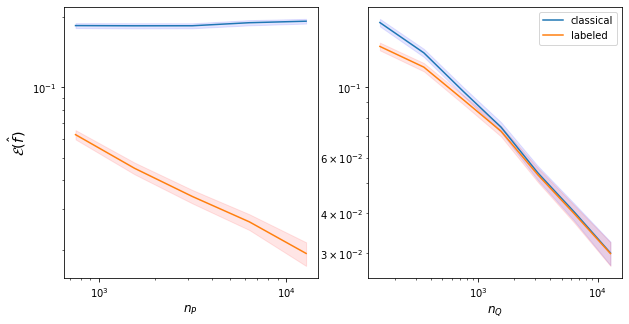

In [9]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()